Static prediction of positions from EMG data
===

This notebook show how to do some basic prediction of positions from emg data.

We will perform the following steps:

 1. Load data from pickle files; one for development of the model (=training and validation) and one for testing.
 2. Make a training/validation split.
 3. Perform some basic preprocessing.
 4. Train an off-the-shelf model with scikit-learn. (RandomForest)
 5. Show some plots of the performance.
 6. Show some metrics of the performance.
 
This notebook requires scikit-learn.

In [14]:
import cPickle

import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
sys.path.append('G:/Documents/GitHub/idp')
from emg import data, display

from sklearn import ensemble, metrics

Load data
---

In [15]:
devl_fn = '../data/subject1/dataset-20140630-1325-FM-1.pkl'
test_fn = '../data/subject1/dataset-20140630-1329-FM-2.pkl'

devl_emg, devl_pos = data.jjmdata_from_file(devl_fn)
test_emg, test_pos = data.jjmdata_from_file(test_fn)

In [16]:
with open('../data/subject1/dataset-20140630-1325-FM-1.pkl') as fp:
    unpickled = cPickle.load(fp)
    print type(unpickled[0])
    print type(unpickled[1])
    
    print '\ninvestigate first list'
    print len(unpickled[0][0])
    print type(unpickled[0][0])
    print unpickled[0][0].shape
    print unpickled[0][0].size
    print unpickled[0][0].dtype
    
    print '\ninvestigate second array'
    print len(unpickled[1])
    print len(unpickled[1][0])
    print type(unpickled[1][0])
    print unpickled[1][0].shape
    print unpickled[1][0].size
    print unpickled[1][0].dtype
    
    print '\ninvestigating reshaped array'
    print unpickled[0][0].reshape((-1,16)).shape

<type 'list'>
<type 'list'>

investigate first list
12221
<type 'numpy.ndarray'>
(12221L, 160L)
1955360
float64

investigate second array
1
12221
<type 'numpy.ndarray'>
(12221L, 7L)
85547
float64

investigating reshaped array
(122210L, 16L)


In [17]:
X, Z, VX, VZ, TX, TZ = data.train_valid_test(devl_emg, devl_pos, test_emg, test_pos, rot=False)

We will perform a full wave rectification only. (See [entry at wikipedia](http://en.wikipedia.org/wiki/Rectifier#Full-wave_rectification)).

In [18]:
X, VX, TX = abs(X), abs(VX), abs(TX)

Model estimation
---

In [19]:
m = ensemble.RandomForestRegressor()

In [20]:
m.fit(X, Z)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=10, n_jobs=1, oob_score=False,
           random_state=None, verbose=0)

Prediction and Visualisation
---

In [1]:
Y = m.predict(X)
VY = m.predict(VX)
TY = m.predict(TX)

NameError: name 'm' is not defined

By changin start and stop, we can change the window we are looking at.

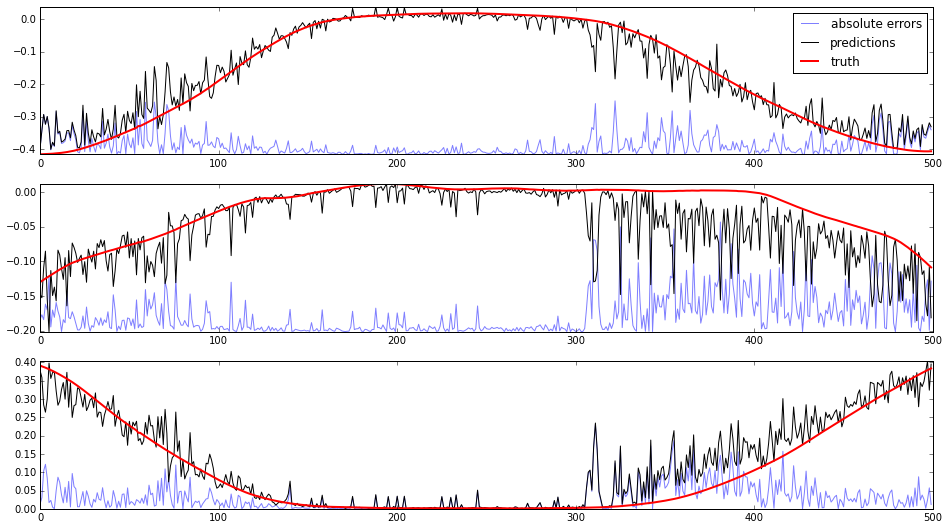

In [25]:
start, stop = 4500, 5000
display.predict_report(X[start:stop], Y[start:stop], Z[start:stop])

Also, some error values.

Note that R2 and RMSE are related: a lower R2 always implies a higher RMSE. Yet, they have different advantages. RMSE is in the same units as the original signal. R2 is perfect when it is 1, 0 when it accounts to guessing and negative when it does sth completely wrong.

In [ ]:
print 'Train R2:       %.4f %.4f %.4f' % tuple(metrics.r2_score(Y[:, i], Z[:, i]) for i in range(Z.shape[1]))
print 'Validation R2:  %.4f %.4f %.4f' % tuple(metrics.r2_score(VY[:, i], VZ[:, i]) for i in range(Z.shape[1]))
print 'Test R2:        %.4f %.4f %.4f' % tuple(metrics.r2_score(TY[:, i], TZ[:, i]) for i in range(Z.shape[1]))
print '---'

print 'Train RMSE:       %.4f %.4f %.4f' % tuple(np.sqrt(metrics.mean_squared_error(Y[:, i], Z[:, i])) for i in range(Z.shape[1]))
print 'Validation RMSE:  %.4f %.4f %.4f' % tuple(np.sqrt(metrics.mean_squared_error(VY[:, i], VZ[:, i])) for i in range(Z.shape[1]))
print 'Test RMSE:        %.4f %.4f %.4f' % tuple(np.sqrt(metrics.mean_squared_error(TY[:, i], TZ[:, i])) for i in range(Z.shape[1]))